In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('flat-prices.csv')

In [4]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [5]:
pd.set_option('display.max_columns', None)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [7]:
df['year']=df['month'].apply(lambda x:x.split('-')[0])
df['month']=df['month'].apply(lambda x:x.split('-')[1])

In [8]:
df['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [9]:
df['town'].nunique()

26

In [10]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [11]:
df['storey_range'].nunique()

9

In [12]:
df['flat_model'].nunique()

13

In [13]:
df['year'] = df['year'].astype(int)

In [14]:
df.select_dtypes('object').columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model'],
      dtype='object')

In [63]:
#removing outliers and creating dummy variables 

In [15]:
df1 = df.nsmallest(int(len(df)/100 *90),'resale_price')
dummies = pd.get_dummies(df1.drop(['lease_commence_date','storey_range','month','street_name'],axis=1),columns=['town', 'flat_type','block','flat_model'],drop_first=True)

In [16]:
dummies

floor_area_sqm  resale_price  year  town_BEDOK  town_BISHAN  \
6644              31.0          5000  1990           0            0   
2440              31.0          5600  1990           0            0   
19376             31.0          5700  1991           0            0   
9585              31.0          5800  1990           0            0   
1                 31.0          6000  1990           0            0   
...                ...           ...   ...         ...          ...   
177762           122.0        404000  1997           0            0   
177768           126.0        404000  1997           0            0   
183922           122.0        404000  1998           0            0   
183987           122.0        404000  1998           0            0   
183988           122.0        404000  1998           0            0   

        town_BUKIT BATOK  town_BUKIT MERAH  town_BUKIT PANJANG  \
6644                   0                 1                   0   
2440                   0                 0                   0   
19376                  0                 0                   0   
9585                   0                 0                   0   
1                      0                 0                   0   
...                  ...               ...                 ...   
177762                 0                 0                   0   
177768                 0                 0                   0   
183922                 0                 0                   0   
183987                 0                 0                   0   
183988                 0                 0                   0   

        town_BUKIT TIMAH  town_CENTRAL AREA  town_CHOA CHU KANG  \
6644                   0                  0                   0   
2440                   0                  0                   0   
19376                  0                  0                   0   
9585                   0                  0                   0   
1                      0                  0                   0   
...                  ...                ...                 ...   
177762                 0                  0                   0   
177768                 0                  0                   0   
183922                 0                  0                   0   
183987                 0                  0                   0   
183988                 0                  0                   0   

        town_CLEMENTI  town_GEYLANG  town_HOUGANG  town_JURONG EAST  \
6644                0             0             0                 0   
2440                0             0             0                 0   
19376               0             0             0                 0   
9585                0             0             0                 0   
1                   0             0             0                 0   
...               ...           ...           ...               ...   
177762              0             0             0                 0   
177768              0             0             0                 0   
183922              0             0             0                 0   
183987              0             0             0                 0   
183988              0             0             0                 0   

        town_JURONG WEST  town_KALLANG/WHAMPOA  town_LIM CHU KANG  \
6644                   0                     0                  0   
2440                   0                     0                  0   
19376                  0                     0                  0   
9585                   0                     0                  0   
1                      0                     0                  0   
...                  ...                   ...                ...   
177762                 0                     0                  0   
177768                 0                     0                  0   
183922                 0                     0                  0   
183987        

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=dummies.drop('resale_price',axis=1)
y=dummies['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
#Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lmmodel = LinearRegression()
lmmodel.fit(X_train,y_train)

LinearRegression()

In [21]:
predictions = lmmodel.predict( X_test)

MAE: 33118.93496765097
MSE: 1774652683.8045719
RMSE: 42126.62677932535


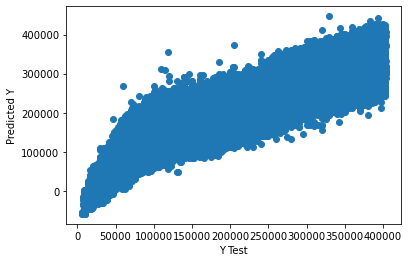

In [22]:
predictions = lmmodel.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [23]:
df['resale_price'].mean()

219541.67470995418

In [47]:
lrr=42126/219541*100
print(lrr)

19.188215413066352


In [25]:
#linear regression RMSE strays 19% from the mean of the actual training data resale price 

In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dtree = DecisionTreeRegressor()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
predictss=dtree.predict(X_test)

MAE: 16808.935528812577
MSE: 577302443.2224771
RMSE: 24027.11891223076


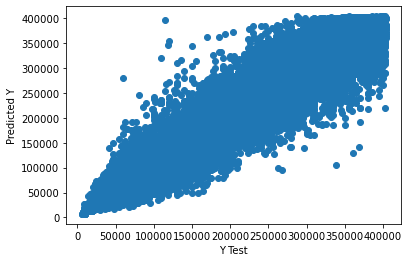

In [31]:
plt.scatter(y_test,predictss)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print('MAE:', metrics.mean_absolute_error(y_test, predictss))
print('MSE:', metrics.mean_squared_error(y_test, predictss))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictss)))

In [46]:
dtr=24027/219541*100
print(dtr)

10.944197211454808


In [33]:
#DecisionTree regression RMSE strays 10% from the mean of the actual training data resale price 

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf =RandomForestRegressor(n_estimators=5)

In [36]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5)

In [37]:
predictrf=rf.predict(X_test)

MAE: 16079.505004494145
MSE: 517404134.607856
RMSE: 22746.51917564215


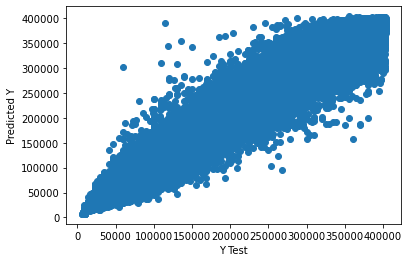

In [38]:
plt.scatter(y_test,predictrf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print('MAE:', metrics.mean_absolute_error(y_test, predictrf))
print('MSE:', metrics.mean_squared_error(y_test, predictrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictrf)))

In [48]:
rfr=16065/df['resale_price'].mean() *100
print(rfr)

7.317517287423517


In [40]:
#RandomForest regression RMSE strays 7% from the mean of the actual training data resale price 

In [53]:
dic = {'Linear model RMSE':[lrr] , 'Decision Tree RMSE':[dtr] ,'Random forest RMSE':[rfr] }

In [54]:
comparison_df=pd.DataFrame(data=dic)

<AxesSubplot:>

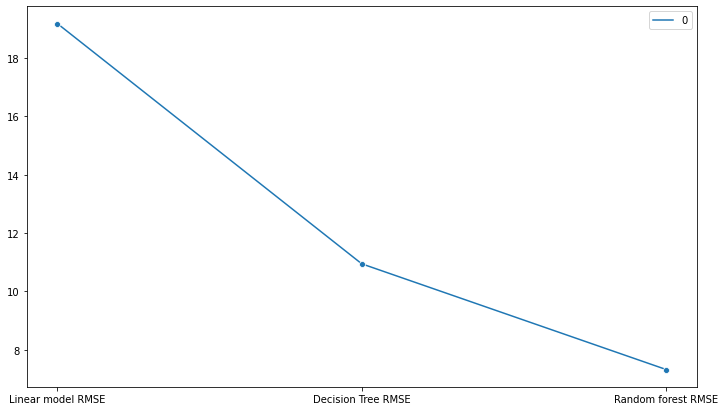

In [62]:
plt.figure(figsize=(12,7))
sns.lineplot(data=comparison_df.transpose(),marker='o')

For this project , Random forest regression proved to be the best choice 